# MNIST DATASET

# Intro

The goal of this project is a simple classification of hand-written digits from the infamous MNIST dataset.

# EDA

First of all, I need to import required (for now) libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random

I will start with a simple overview of the dataset.

In [3]:
df = pd.read_csv('train.csv')
display(df.columns)
print('number of features: ', len(df.columns))

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

number of features:  785


There are 784 features (which is simply an image with 28x28 resolution streched in one vector) and one target variable.

Now I will determine how many unique classes this dataset has as well as their distribution.

number of unique classes:  label    10
dtype: int64


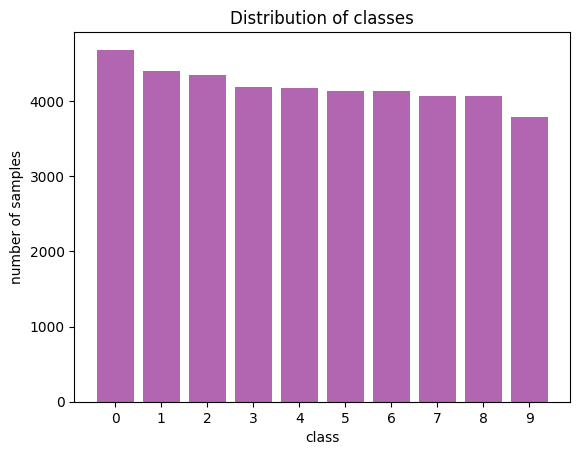

In [4]:
print('number of unique classes: ', df[['label']].nunique())
class_distr = df[['label']].value_counts()
ticks_distr = np.arange(0, 10, 1)
plt.bar(ticks_distr, class_distr, color='purple', alpha=0.6)
plt.xticks(ticks_distr)
plt.title('Distribution of classes')
plt.ylabel('number of samples')
plt.xlabel('class')
plt.show();

There is a small imbalanceness, however, at this point I can't possibly know how it will affect the performance of the models. So in the following there might be a reason to make some additional preprocessing of the data.

Now I will look at the overall characteristics of the data.

In [5]:
display(df.describe())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


The data behaves quite well. The values that samples can take are within reasonable range (0-255).

Now I will check if the dataset has duplicates.

In [9]:
print(df.duplicated().sum())

0


Now I split the data into features and target subsets.

In [6]:
x_train = df.iloc[:, 1:]
y_train = df[['label']]

Let's take a closer look at one of the samples:

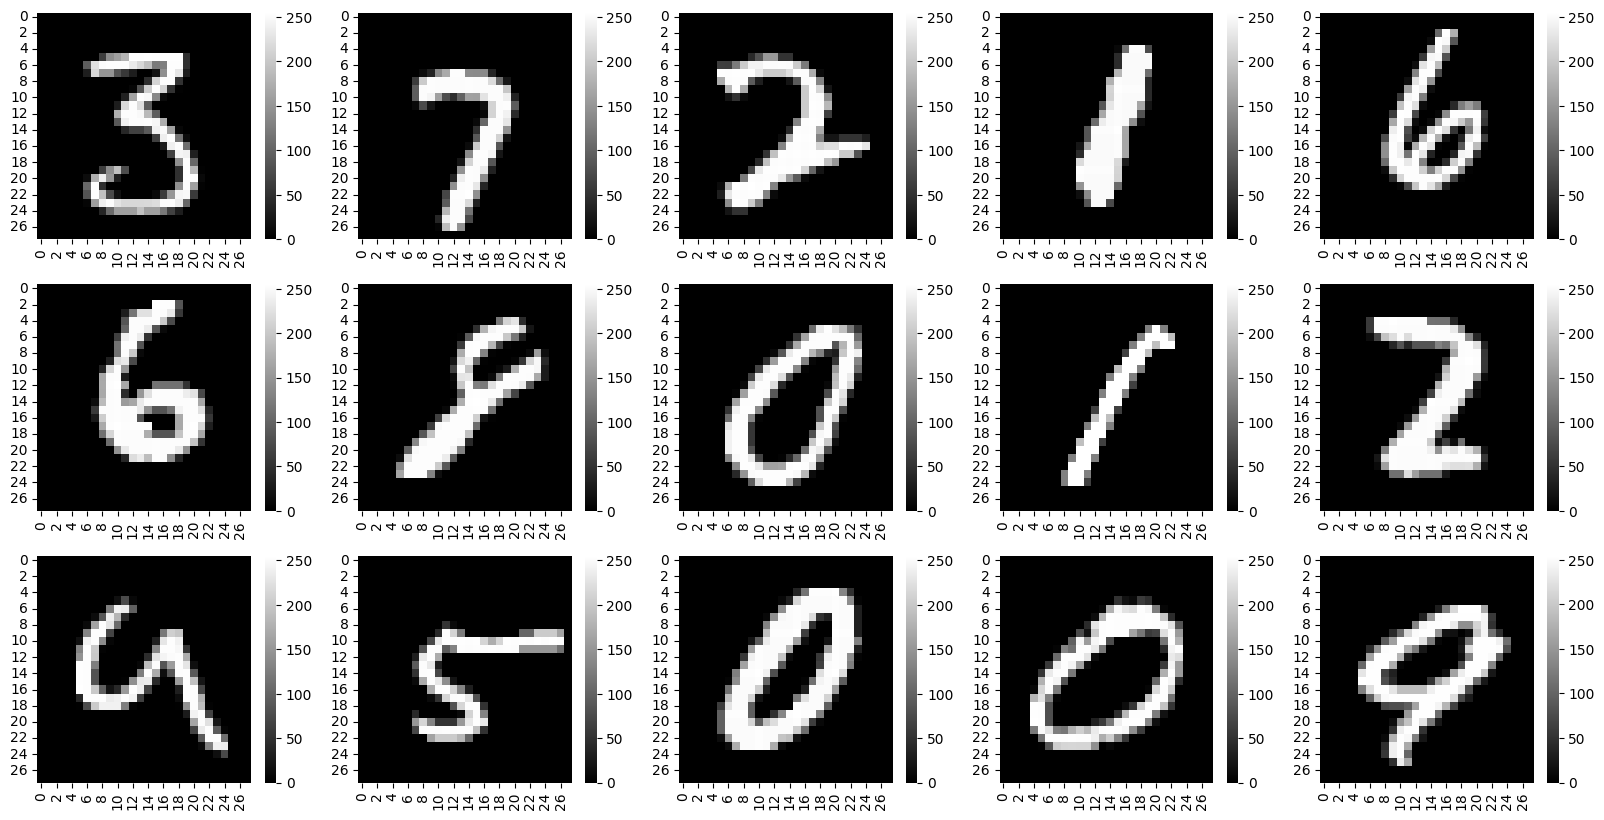

In [7]:
plt.rcParams["figure.figsize"] = (20,10)
for i in range (1, 16):
    plt.subplot(3, 5, i)
    sample_vector = x_train.iloc[random.randint(1, len(df)), :]
    sample_image = sample_vector.values.reshape(28, 28)
    sb.heatmap(sample_image, cmap = 'gray')